In [1]:
# downloading the data
import os
import tarfile
import urllib

# loading the data
import pandas as pd

# working with arrays and dataframe
import numpy as np

# data preprocessing and analyzing
import matplotlib.pyplot as plt

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok = True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    print("Done Downloading")

In [2]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [3]:
housing = load_housing_data()
housing.head()
#housing.info()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#finding out categories in a column
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
#describing the given data sets
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


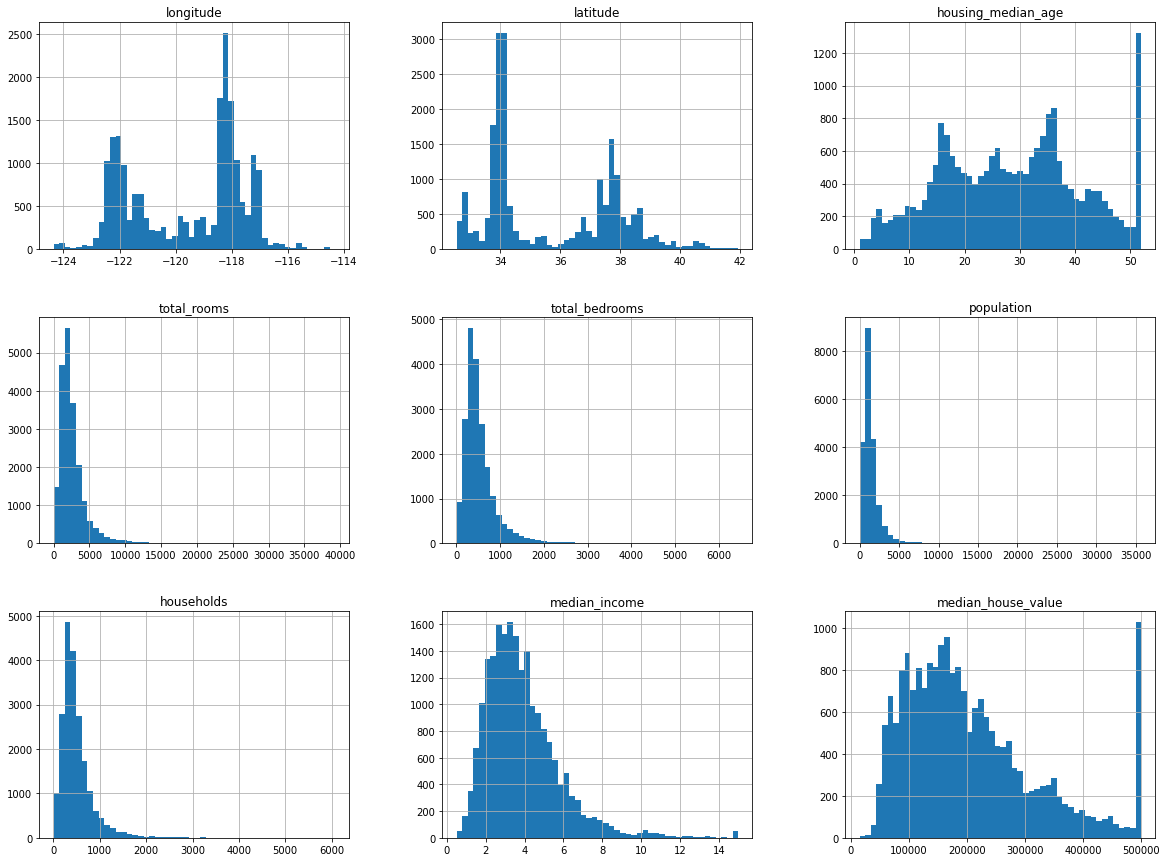

In [7]:
# option 2: describing the given datasets
%matplotlib inline
housing.hist(bins = 50 , figsize = (20,15))
plt.show()

What we notice about the data :
1. It is tail heavy ie. most of the values that we observe are skewed the right side of the graph. This makes it harder for machine learning algorithms to detect patterns. To solve this problem we try to make the graph more bellshaped 
2. Data is capped. ie. the data uses different types of scales to preprocessed values
3. The capped data will result in a model that does not predict values more than the max set of the training set. ie. the model will fail to predict values greater than 500000 in our case. two ways to solve this: 
    - collection of uncapped data and labels
    - remove those dataset from training and testing sets
4. Different scales for columns


In [8]:
# Create a test set - Do not look at it, or the model will be prone to data-snooping bias
# 20% instances of the total dataset goes for making the testing set
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(housing, test_size=0.20, random_state = 42)
print(len(housing))
print(len(train_set))
print(len(test_set))

20640
16512
4128


When we make our testing sample we need to be confident that it represents the whole population of the data we are dealing with. If the dataset given to us is large, we can randomly select values without any sampling error. But when the data set is relatively smaller, the test dataset can be prone to sampling error - thus we need to "stratify" or divide the total population, to maintain the error and bais free sampling. This is also the case when the dataset has irregular amounts of examples for each classification (in a certain proportion) and the testing sample should maintain that proportion.

In this example we look at the median income graph and notice that the data is more aggregated between the values, 0.5 to 6. To make a good sample we need to stratify and maintain the ratios between selecting each attribute.

<AxesSubplot:>

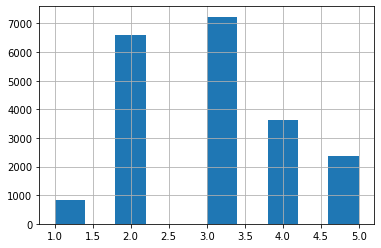

In [9]:
# here we cut the median_income of the population into many stratas, doing this helps us get a correct sample
# the testing as the dataset has irregular amounts of examples for each classification.

housing["income_cat"] = pd.cut(housing["median_income"],bins=[0.0,1.5,3.0,4.5,6.0,np.inf], labels=[1,2,3,4,5])
housing["income_cat"].hist()


In [10]:
# We import a sampling class which will help us split our data correctly using the stratified sampling methodology
from sklearn.model_selection import StratifiedShuffleSplit
# here we make splits or make "stratas"
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)


for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set =  housing.loc[train_index] # train index gives the indexes of the training set 
    strat_test_set = housing.loc[test_index] # test index gives the indxes of the testing set

In [11]:
from sklearn.model_selection import train_test_split
train_income_set, test_income_set = train_test_split(housing["income_cat"] , random_state = 42)
print(test_income_set.value_counts()/len(test_income_set))


3    0.354845
2    0.320736
4    0.170543
5    0.112209
1    0.041667
Name: income_cat, dtype: float64


In [12]:
# median income of each strata after applying the STRATIFIEDKFOLDING and SHUFFLING in the housing dataset
# print(housing["income_cat"].value_counts()/len(housing))
# real overall income of each strata in the housing dataset
# print(strat_test_set["income_cat"].value_counts()/len(strat_test_set))

obj = {
        "overall" :  housing["income_cat"].value_counts()/len(housing),
        "Stratified": strat_test_set["income_cat"].value_counts()/len(strat_test_set),
        "random" : test_income_set.value_counts()/len(test_income_set)
      }

stratifiedvsrandomsampling = pd.DataFrame(obj)
print(stratifiedvsrandomsampling)

    overall  Stratified    random
3  0.350581    0.350533  0.354845
2  0.318847    0.318798  0.320736
4  0.176308    0.176357  0.170543
5  0.114438    0.114583  0.112209
1  0.039826    0.039729  0.041667


In [13]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

In [14]:
print(set_)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5241     -118.39     34.12                29.0       6447.0          1012.0   
10970    -117.86     33.77                39.0       4159.0           655.0   
20351    -119.05     34.21                27.0       4357.0           926.0   
6568     -118.15     34.20                52.0       1786.0           306.0   
13285    -117.68     34.07                32.0       1775.0           314.0   
...          ...       ...                 ...          ...             ...   
20519    -121.53     38.58                33.0       4988.0          1169.0   
17430    -120.44     34.65                30.0       2265.0           512.0   
4019     -118.49     34.18                31.0       3073.0           674.0   
12107    -117.32     33.99                27.0       5464.0           850.0   
2398     -118.91     36.79                19.0       1616.0           324.0   

       population  households  median_income  media

## Exploring the data
So far we have looked very generally into the data. Now is the time to go in depth, and get some detailed information of the data we are working with.
Once the test set has been defined, we can go ahead and take a sneek peek into the data. We need to know what kind of data is given by visualising it. The insights we achieve after visualising can then be used to make a decision about the type of the model that can be used to make the model. 

In [15]:
# we first make a copy of the training data(keep in mind to stay away from the testing data) to play with the data 
# without affecting the actual data. 
housing = strat_train_set.copy()

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   
...          ...       ...                 ...          ...             ...   
6563     -118.13     34.20                46.0       1271.0           236.0   
12053    -117.56     33.88                40.0       1196.0           294.0   
13908    -116.40     34.09                 9.0       4855.0           872.0   
11159    -118.01     33.82                31.0       1960.0           380.0   
15775    -122.45     37.77                52.0       3095.0           682.0   

       population  households  median_income  media

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

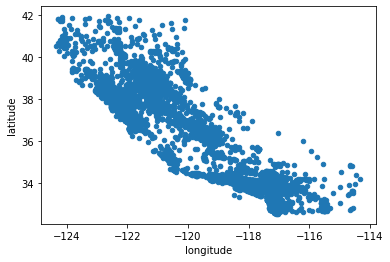

In [16]:
# scatter plot the data
print(housing)
housing.plot(kind = "scatter", x = "longitude", y = "latitude")

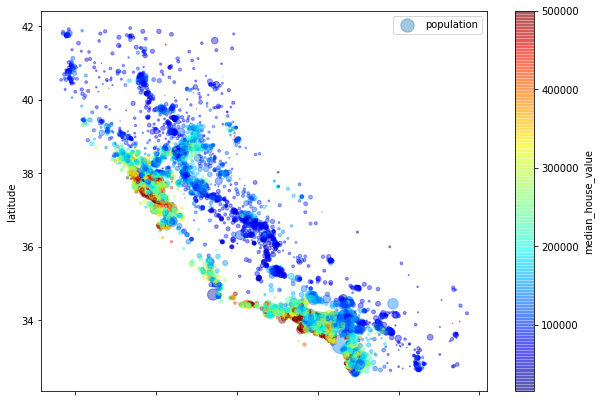

In [17]:
# s - size, c = color
housing.plot(kind="scatter",x= "longitude", y="latitude",alpha = 0.4, 
             s=housing["population"]/100, label = "population",figsize=(10,7), c="median_house_value",
            cmap=plt.get_cmap("jet"), colorbar = True)
plt.legend()

This graph shows the prices of various houses. The houses which are close to the sea are highly priced while the one away from the sea are cheaper. This is simple and straight forward rule that we can apply to this data. Although, some places even if they are closer to the sea, are  priced low. this means that the rule is not "simple" after all. This section we will try to find the correlation between various aspect of our dataset.

## Correlation
The dataset given to us is not large and thus pearson's R or the standard correlation coefficient can be  calculated. 

In [18]:
corr_matrix = housing.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64


This array shows us that the median house value is linearly and directly dependent on the median_income to a lot extent. And inversely, median_house_value is linearly and undirectly dependent on the latitude, that when the latitude goes high, the median_house_value goes low. (inversely proportional so to say).
> Note that pearson's R value will show us only linear relationships and fails if the relationship between data is non linear, eg if x is close to 0, then y generally goes up 

Another way of checking correlation between attributes is to use pandas scatter_matrix() function, which plots every numerical attribute against every other numerical attribute. So given 11 attributes, there will be 121 plots, which is a lot. A quick fix to this will be to choose only those attributes that actually matter.
In our case, median_house_value, median_value, total_rooms, housing_median_age

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

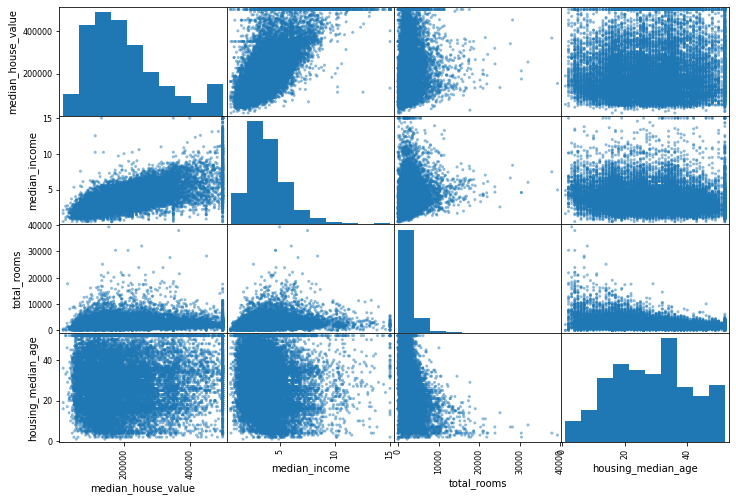

In [21]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income","total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize= (12,8))

Most interesting graph in this set of graphs is the median_income vs median_house_value

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

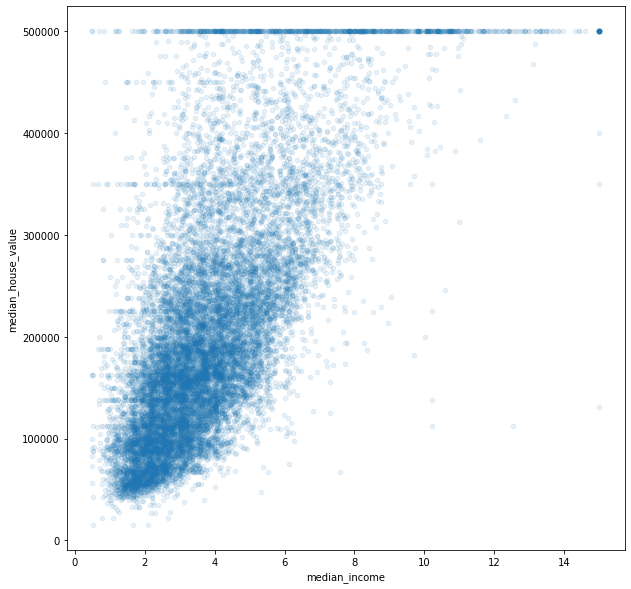

In [23]:
housing.plot(kind= "scatter",x="median_income",y="median_house_value", alpha = 0.1, figsize=(10,10))

Learnings from this graph:
- strong correlation
- clear price cap at 500000
- straight line at various places like 350000 and faintly near 450000ish
- the goal is remove all these values, as they form scope of inaccuracy in the final model

Now we start creating new attributes

In [26]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_household"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_household     -0.259984
Name: median_house_value, dtype: float64